# Repeat result in Masich et. al using MOM025 DATA

Recent update 3 Sept 2017

In [272]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import os
import pickle
from numpy import math

import pandas as pd
import xarray as xr
from glob import glob
from mpl_toolkits.basemap import Basemap, shiftgrid


# Load Data

In [189]:
## Load data

%time
OceanFile1 = '/g/data3/hh5/tmp/cosima/access-om2-025/025deg_jra55_ryf_spinup4/output008/ocean/ocean_grid.nc'
dsx1 = xr.open_dataset(OceanFile1, engine='netcdf4')
kmt = -dsx1.kmt.isel(yt_ocean=217)  # "number of depth levels on t-grid"
depth = -dsx1.ht.isel(yt_ocean=217)   ## H
dxu = dsx1.dxu ## dxu

OceanFile2 =  '/g/data3/hh5/tmp/cosima/access-om2-025/025deg_jra55_ryf_spinup4/output008/ocean/ocean_month.nc'
dsx2 = xr.open_dataset(OceanFile2, engine='netcdf4')
taux = dxu*dsx2.tau_x.mean('time')  ## tau_x
pbot = dsx2.pbot_t.mean('time').isel(yt_ocean=217)     ## p_bot
eta0 = dsx2.eta_t.mean('time') ## \eta
eta = dsx2.sea_level.mean('time') ## sea_level

OceanFile3 =  '/g/data3/hh5/tmp/cosima/access-om2-025/025deg_jra55_ryf_spinup4/output008/ocean/ocean.nc'
dsx3 = xr.open_dataset(OceanFile3, engine='netcdf4')
rho = dsx3.rho.mean('time').isel(yt_ocean=217)        ## \rho in-situ
dz = dsx3.dzt.mean('time').isel(yt_ocean=217)      ## t-cell thickness
g = 9.8196
rho0=1035

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 12.9 µs


## Step 1: 
## define water thickness as h: $h = -\int dz$
## define bottom pressure as p: $p = \int \rho*g*dz$

In [59]:
h = -dz.sum('st_ocean')

dp = rho*g*dz
p = dp.sum('st_ocean')

## Step 2:
## Draw the single topog, kmt as layer number, -h as height of topog structure

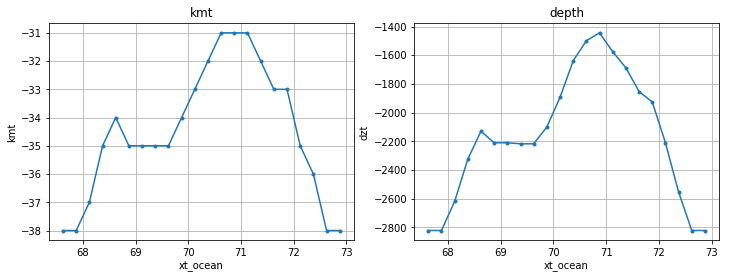

In [357]:
plt.figure(figsize=(12,4))

plt.subplot(121)
kmt.isel(xt_ocean=np.arange(1390,1412)).plot(marker='.')
plt.grid()
plt.title('kmt')

plt.subplot(122)
h.isel(xt_ocean=np.arange(1390,1412)).plot(marker='.')
plt.grid()
plt.title('depth')

## Step 3: Calculate  p*dz according to the methods discussed. From cell 1 to cell 35 on the plot

In [328]:
x=1391
z=37

dz1= dz.isel(xt_ocean=x).isel(st_ocean=z)
rho1 = rho.isel(xt_ocean=x).isel(st_ocean=z)

pb1 = p.isel(xt_ocean=x)

dp1 = -(pb1*dz1-g*rho1*dz1**2/2)

In [329]:
x=1392
z=36

dz2 = dz.isel(xt_ocean=x-1).isel(st_ocean=z)-dz.isel(xt_ocean=x).isel(st_ocean=z)  
dz3 = dz.isel(xt_ocean=x).isel(st_ocean=z) 

rho2 = rho.isel(xt_ocean=x).isel(st_ocean=z)

pb2 = p.isel(xt_ocean=x)

dp2 = -(pb2*(dz2+dz3)+g*rho2*(dz2**2/2-dz3**2/2))

In [330]:
x=1392
z=35

dz4 = dz.isel(xt_ocean=x).isel(st_ocean=z)

rho4 = rho.isel(xt_ocean=x).isel(st_ocean=z)

pb4 = p.isel(xt_ocean=x)-g*rho2*dz3

dp4 = -(pb4*(dz4)-g*rho4*(dz4**2/2))

In [331]:
x=1393
z=34

dz5 = dz.isel(xt_ocean=x-1).isel(st_ocean=z)-dz.isel(xt_ocean=x).isel(st_ocean=z)  
dz6 = dz.isel(xt_ocean=x).isel(st_ocean=z) 

rho6 = rho.isel(xt_ocean=x).isel(st_ocean=z)

pb6 = p.isel(xt_ocean=x)

dp6 = -(pb6*(dz5+dz6)+g*rho6*(dz5**2/2-dz6**2/2))

In [332]:
x=1395
z=34

dz10 = dz.isel(xt_ocean=x+1).isel(st_ocean=z)-dz.isel(xt_ocean=x).isel(st_ocean=z)  
dz9 = dz.isel(xt_ocean=x).isel(st_ocean=z) 

rho9 = rho.isel(xt_ocean=x).isel(st_ocean=z)

pb9 = p.isel(xt_ocean=x)

dp9 = (pb9*(dz10+dz9)+g*rho9*(dz10**2/2-dz9**2/2))

In [333]:
x=1396
z=34

dz11 = dz.isel(xt_ocean=x+1).isel(st_ocean=z)-dz.isel(xt_ocean=x).isel(st_ocean=z)  

rho11 = rho.isel(xt_ocean=x).isel(st_ocean=z)

pb11 =p.isel(xt_ocean=x)

dp11 = (pb11*(dz11)+g*rho11*(dz11**2/2))

In [334]:
x=1397
z=34

dz12 = dz.isel(xt_ocean=x+1).isel(st_ocean=z)-dz.isel(xt_ocean=x).isel(st_ocean=z)  

rho12 = rho.isel(xt_ocean=x).isel(st_ocean=z)

pb12 = p.isel(xt_ocean=x)

dp12 = (pb12*(dz12)+g*rho12*(dz12**2/2))

In [335]:
x=1398
z=34

dz13 = dz.isel(xt_ocean=x).isel(st_ocean=z)  

rho13 = rho.isel(xt_ocean=x).isel(st_ocean=z)

pb13 = p.isel(xt_ocean=x)

dp13 = -(pb13*(dz13)-g*rho13*(dz13**2/2))

In [336]:
x=1399
z=33

dz14 = dz.isel(xt_ocean=x-1).isel(st_ocean=z)-dz.isel(xt_ocean=x).isel(st_ocean=z)  
dz15 = dz.isel(xt_ocean=x).isel(st_ocean=z) 

rho14 = rho.isel(xt_ocean=x).isel(st_ocean=z)

pb14 = p.isel(xt_ocean=x)

dp14 = -(pb14*(dz14+dz15)+g*rho14*(dz14**2/2-dz15**2/2))

In [337]:
x=1400
z=32

dz16 = dz.isel(xt_ocean=x-1).isel(st_ocean=z)-dz.isel(xt_ocean=x).isel(st_ocean=z)  
dz17 = dz.isel(xt_ocean=x).isel(st_ocean=z) 

rho16 = rho.isel(xt_ocean=x).isel(st_ocean=z)

pb16 = p.isel(xt_ocean=x)

dp16 = -(pb16*(dz16+dz17)+g*rho16*(dz16**2/2-dz17**2/2))

In [338]:
x=1401
z=31

dz18 = dz.isel(xt_ocean=x-1).isel(st_ocean=z)-dz.isel(xt_ocean=x).isel(st_ocean=z)  
dz19 = dz.isel(xt_ocean=x).isel(st_ocean=z) 

rho18 = rho.isel(xt_ocean=x).isel(st_ocean=z)

pb18 = p.isel(xt_ocean=x)

dp18 = -(pb18*(dz18+dz19)+g*rho18*(dz18**2/2-dz19**2/2))

In [339]:
x=1402
z=30

dz20 = dz.isel(xt_ocean=x-1).isel(st_ocean=z)-dz.isel(xt_ocean=x).isel(st_ocean=z)  
dz21 = dz.isel(xt_ocean=x).isel(st_ocean=z)- dz.isel(xt_ocean=x+1).isel(st_ocean=z)

rho20 = rho.isel(xt_ocean=x).isel(st_ocean=z)

pb20 = p.isel(xt_ocean=x)

dp20 = -(pb20*(dz20+dz21)+g*rho20*(dz20**2/2-dz21**2/2))

In [340]:
x=1404
z=30

dz23 = dz.isel(xt_ocean=x+1).isel(st_ocean=z)-dz.isel(xt_ocean=x).isel(st_ocean=z)  
dz22 = dz.isel(xt_ocean=x).isel(st_ocean=z) - dz.isel(xt_ocean=x-1).isel(st_ocean=z) 

rho22 = rho.isel(xt_ocean=x).isel(st_ocean=z)

pb22 = p.isel(xt_ocean=x)

dp22 = (pb22*(dz22+dz23)+g*rho22*(dz23**2/2-dz22**2/2))

In [341]:
x=1405
z=31

dz25 = dz.isel(xt_ocean=x+1).isel(st_ocean=z)-dz.isel(xt_ocean=x).isel(st_ocean=z)  
dz24 = dz.isel(xt_ocean=x).isel(st_ocean=z) 

rho24 = rho.isel(xt_ocean=x).isel(st_ocean=z)

pb24 = p.isel(xt_ocean=x)

dp24 = (pb24*(dz24+dz25)+g*rho24*(dz25**2/2-dz24**2/2))

In [342]:
x=1406
z=32

dz27 = dz.isel(xt_ocean=x+1).isel(st_ocean=z)-dz.isel(xt_ocean=x).isel(st_ocean=z)  
dz26 = dz.isel(xt_ocean=x).isel(st_ocean=z) 

rho26 = rho.isel(xt_ocean=x).isel(st_ocean=z)

pb26 = p.isel(xt_ocean=x)

dp26 = (pb26*(dz26+dz27)+g*rho26*(dz27**2/2-dz26**2/2))

In [343]:
x=1407
z=32

dz28 = dz.isel(xt_ocean=x+1).isel(st_ocean=z)-dz.isel(xt_ocean=x).isel(st_ocean=z)  

rho28 = rho.isel(xt_ocean=x).isel(st_ocean=z)

pb28 = p.isel(xt_ocean=x)

dp28 = (pb28*(dz28)+g*rho28*(dz28**2/2))

In [344]:
x=1408
z=33

dz29 = dz.isel(xt_ocean=x).isel(st_ocean=z)  

rho29 = rho.isel(xt_ocean=x).isel(st_ocean=z)

pb29 = p.isel(xt_ocean=x-1)+rho28*g*dz28

dp29 = (pb29*(dz29)+g*rho29*(dz29**2/2))

In [345]:
x=1408
z=34

dz31 = dz.isel(xt_ocean=x+1).isel(st_ocean=z)-dz.isel(xt_ocean=x).isel(st_ocean=z)  
dz30 = dz.isel(xt_ocean=x).isel(st_ocean=z) 

rho30 = rho.isel(xt_ocean=x).isel(st_ocean=z)

pb30 = p.isel(xt_ocean=x)

dp30 = (pb30*(dz30+dz31)+g*rho30*(dz31**2/2-dz30**2/2))

In [346]:
x=1409
z=35

dz33 = dz.isel(xt_ocean=x+1).isel(st_ocean=z)-dz.isel(xt_ocean=x).isel(st_ocean=z)  
dz32 = dz.isel(xt_ocean=x).isel(st_ocean=z) 

rho32 = rho.isel(xt_ocean=x).isel(st_ocean=z)

pb32 = p.isel(xt_ocean=x)

dp32 = (pb32*(dz32+dz33)+g*rho32*(dz33**2/2-dz32*2/2))

In [347]:
x=1410
z=36

dz34 = dz.isel(xt_ocean=x).isel(st_ocean=z)  

rho34 = rho.isel(xt_ocean=x).isel(st_ocean=z)

pb34 = p.isel(xt_ocean=x-1)+rho32*g*dz33

dp34 = (pb34*(dz34)+g*rho34*(dz34**2/2))

In [348]:
x=1410
z=37

dz35 = dz.isel(xt_ocean=x).isel(st_ocean=z)  

rho35 = rho.isel(xt_ocean=x).isel(st_ocean=z)

pb35 = p.isel(xt_ocean=x-1)

dp35 = (pb35*(dz35)-g*rho35*(dz35**2/2))

## Step 4: Sum them up

In [349]:
dp1 +dp2 +dp4 +dp6 +dp9 +dp11+dp12+dp13 +dp14 +dp16 +dp18 +dp20 +dp22 +dp24 +dp26 +dp28 +dp29 +dp30 +dp32 +dp34 +dp35 

<xarray.DataArray ()>
array(55076517.38211954)
Coordinates:
    yt_ocean  float64 -57.23
    xt_ocean  float64 72.62

## Step 5: Compare with $ -\int p dh$, where $dh(n) = 0.5*(h(n+1)-h(n-1))$

In [358]:
dh = np.zeros(depth.isel(xt_ocean=np.arange(1391,1411)).shape)

In [359]:
dh[:] = 0.5*(h[1392:1412].values - h[1390:1410].values)

In [360]:
print dh

[ 101.13623953  248.53771925  245.08419561   57.27506781  -40.40403938
   -3.58658361   -3.58710146   58.52799845  161.94951344  230.84681988
  197.51214027   97.46390104  -38.5719347  -122.1178236  -138.61115217
 -118.86380863 -178.68962622 -314.16276884 -305.79964304 -133.90218496]


In [362]:
x = -dh*p.isel(xt_ocean=np.arange(1391,1411))

print x.sum('xt_ocean')

<xarray.DataArray ()>
array(-855259.2200131416)
Coordinates:
    yt_ocean  float64 -57.23
